In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk, sys

In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df = df.rename(columns = {'v1':'Class','v2':'Text'})
df['count']=df['Text'].str.len()
df = df.replace(['ham','spam'],[0, 1])
df.head()

,Class,Text,count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [5]:
ham  = df[df.Class == 0]
ham_count  = ham.sort_values('count',ascending=True)
print(ham.head())
print ("Number of ham messages in data set:", ham['Class'].count())

   Class                                               Text  count
0      0  Go until jurong point, crazy.. Available only ...    111
1      0                      Ok lar... Joking wif u oni...     29
3      0  U dun say so early hor... U c already then say...     49
4      0  Nah I don't think he goes to usf, he lives aro...     61
6      0  Even my brother is not like to speak with me. ...     77
Number of ham messages in data set: 4825


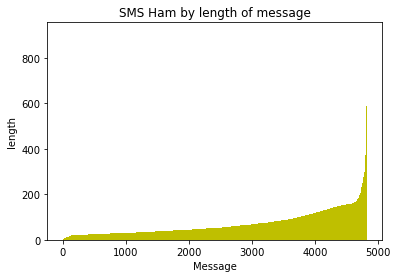

In [6]:
%matplotlib inline
ax = plt.axes()
xline_ham = np.linspace(0, len(ham_count) - 1, len(ham_count))
ax.bar(xline_ham, ham_count['count'], width=2.2, color='y')
ax.set_title('SMS Ham by length of message')
plt.xlabel('Message')
plt.ylabel('length')
plt.show()

In [7]:
spam = df[df.Class == 1]
spam_count = spam.sort_values('count')
print ("Number of spam messages in data set:", spam['Class'].count())
print(spam.head())

Number of spam messages in data set: 747
    Class                                               Text  count
2       1  Free entry in 2 a wkly comp to win FA Cup fina...    155
5       1  FreeMsg Hey there darling it's been 3 week's n...    148
8       1  WINNER!! As a valued network customer you have...    158
9       1  Had your mobile 11 months or more? U R entitle...    154
11      1  SIX chances to win CASH! From 100 to 20,000 po...    136


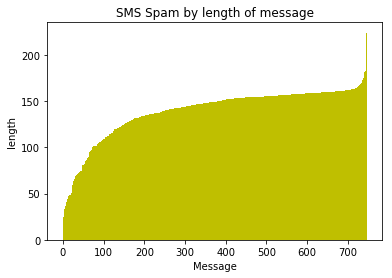

In [8]:
ax = plt.axes()
xline_spam = np.linspace(0, len(spam_count) - 1, len(spam_count))
ax.bar(xline_spam, spam_count['count'], width=2.2, color='y')
ax.set_title('SMS Spam by length of message')
plt.xlabel('Message')
plt.ylabel('length')
plt.show()

In [9]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


stopset = set(stopwords.words("english"))
vectorizer = TfidfVectorizer(stop_words=stopset,binary=True)

In [10]:
# Extract feature column 'Text'
X = vectorizer.fit_transform(df.Text)
# Extract target column 'Class'
y = df.Class

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80)
    
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))    

Training set has 4457 samples.
Testing set has 1115 samples.


In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [14]:
def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)

def predict_labels(clf, features):
    return (clf.predict(features))

In [15]:
A = MultinomialNB(alpha=1.0,fit_prior=True)
B = DecisionTreeClassifier(random_state=42)
C = AdaBoostClassifier(n_estimators=100)
D = KNeighborsClassifier(n_neighbors=3)
E = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

clf = [A,B,C,D,E]
pred_val = [0,0,0,0,0]

for a in range(0,5):
    train_classifier(clf[a], X_train, y_train)
    y_pred = predict_labels(clf[a],X_test)
    pred_val[a] = f1_score(y_test, y_pred,  average='binary') 
    print (pred_val[a])

0.888086642599
0.85049833887
0.906574394464
0.570093457944
0.887272727273


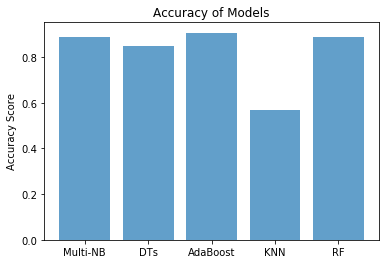

In [17]:
objects = ('Multi-NB', 'DTs', 'AdaBoost', 'KNN', 'RF')
y_pos = np.arange(len(objects))
y_val = [ x for x in pred_val]
plt.bar(y_pos,y_val, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')
plt.show()